<a href="https://colab.research.google.com/github/almartcas/oooo/blob/main/Comparacion_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cython
!pip install ripser

from ripser import ripser
from persim import plot_diagrams
import numpy as np
import matplotlib.pyplot as plt
from ripser import Rips

In [ ]:
!pip install gudhi
import gudhi
import gudhi.wasserstein

POT (Python Optimal Transport) package is not installed. Try to run $ conda install -c conda-forge pot ; or $ pip install POT


In [ ]:
data=np.array([[0.9822056 , 0.36493877],
       [0.50298887, 0.9267979 ],
       [0.23574578, 0.35935633],
       [0.55150194, 0.54188547],
       [0.31985077, 0.98478966],
       [0.90971858, 0.60986595],
       [0.66289489, 0.98271819],
       [0.76184398, 0.0173718 ]])
data

array([[0.9822056 , 0.36493877],
       [0.50298887, 0.9267979 ],
       [0.23574578, 0.35935633],
       [0.55150194, 0.54188547],
       [0.31985077, 0.98478966],
       [0.90971858, 0.60986595],
       [0.66289489, 0.98271819],
       [0.76184398, 0.0173718 ]])

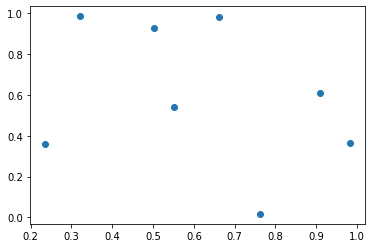

In [ ]:
x, y = data.T
plt.scatter(x,y)
plt.show()

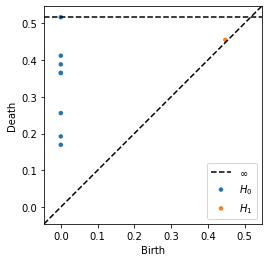

In [ ]:
diagrams = ripser(data)['dgms']
plot_diagrams(diagrams, show=True)

In [ ]:
diagrams

[array([[0.        , 0.16940193],
        [0.        , 0.19210051],
        [0.        , 0.25542843],
        [0.        , 0.36461008],
        [0.        , 0.36471748],
        [0.        , 0.3879576 ],
        [0.        , 0.41153619],
        [0.        ,        inf]]), array([[0.44714731, 0.45468876]])]

In [ ]:
diag1 = [[0.        , 0.16940193],
        [0.        , 0.19210051],
        [0.        , 0.25542843],
        [0.        , 0.36461008],
        [0.        , 0.36471748],
        [0.        , 0.3879576 ],
        [0.        , 0.41153619],
        [0.        , float('Inf')]]
diag2 = [[0.        , 0.2],
        [0.        , 0.2],
        [0.        , 0.3],
        [0.        , 0.4],
        [0.        , 0.4],
        [0.        , 0.4],
        [0.        , 0.4],
        [0.        , float('Inf')]]


message = "La distancia de Bottleneck es " + '%.2f' % gudhi.bottleneck_distance(diag1, diag2)
print(message)

La distancia de Bottleneck es 0.04


In [ ]:
dgm1 = np.array([[0.        , 0.16940193],
        [0.        , 0.19210051],
        [0.        , 0.25542843],
        [0.        , 0.36461008],
        [0.        , 0.36471748],
        [0.        , 0.3879576 ],
        [0.        , 0.41153619]])
dgm2 = np.array([[0.        , 0.2],
        [0.        , 0.2],
        [0.        , 0.3],
        [0.        , 0.4],
        [0.        , 0.4],
        [0.        , 0.4],
        [0.        , 0.4]])
cost, matchings = gudhi.wasserstein.wasserstein_distance(dgm1, dgm2, matching=True, order=1, internal_p=2)

message_cost = "Wasserstein distance value = %.2f" %cost
print(message_cost)
dgm1_to_diagonal = matchings[matchings[:,1] == -1, 0]
dgm2_to_diagonal = matchings[matchings[:,0] == -1, 1]
off_diagonal_match = np.delete(matchings, np.where(matchings == -1)[0], axis=0)

for i,j in off_diagonal_match:
    print("point %s in dgm1 is matched to point %s in dgm2" %(i,j))
for i in dgm1_to_diagonal:
    print("point %s in dgm1 is matched to the diagonal" %i)
for j in dgm2_to_diagonal:
    print("point %s in dgm2 is matched to the diagonal" %j)

NameError: ignored